In [1]:
import pandas as pd
import glob
from keras.models import Sequential , load_model
import numpy as np
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
data= pd.read_csv('final.csv')
data.head(10)

C:\Users\TasnemmAbdEltawabAbd\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,class
0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,...,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.000000,5.200000,0
1,1.020,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,...,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.000000,4.707435,0
2,1.010,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,...,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.000000,4.707435,0
3,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,...,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.000000,3.900000,0
4,1.010,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,...,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.000000,4.600000,0
5,1.015,3.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,...,74.000000,25.0,1.1,142.000000,3.200000,12.2,39.0,7800.000000,4.400000,0
6,1.010,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,...,100.000000,54.0,24.0,104.000000,4.000000,12.4,36.0,8406.122449,4.707435,0
7,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,no,yes,no,...,410.000000,31.0,1.1,137.528754,4.627244,12.4,44.0,6900.000000,5.000000,0
8,1.015,3.0,0.0,normal,abnormal,present,notpresent,yes,yes,no,...,138.000000,60.0,1.9,137.528754,4.627244,10.8,33.0,9600.000000,4.000000,0
9,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,yes,yes,no,...,70.000000,107.0,7.2,114.000000,3.700000,9.5,29.0,12100.000000,3.700000,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sg      353 non-null    float64
 1   al      354 non-null    float64
 2   su      351 non-null    float64
 3   rbc     400 non-null    object 
 4   pc      400 non-null    object 
 5   pcc     400 non-null    object 
 6   ba      400 non-null    object 
 7   htn     398 non-null    object 
 8   dm      398 non-null    object 
 9   cad     398 non-null    object 
 10  appet   400 non-null    object 
 11  pe      400 non-null    object 
 12  ane     400 non-null    object 
 13  id      400 non-null    float64
 14  age     400 non-null    float64
 15  bp      400 non-null    float64
 16  bgr     400 non-null    float64
 17  bu      400 non-null    float64
 18  sc      400 non-null    float64
 19  sod     400 non-null    float64
 20  pot     400 non-null    float64
 21  hemo    400 non-null    float64
 22  pc

In [3]:
data.shape

(400, 26)

In [4]:
data.columns = ['specific gravity','albumin' , 'suger', 'red_blood_cells', 'pus_cells',
        'pus _cell_clumps', 'bacteria', 'hupertension', 'diabetes_mellitus', 'coronary_artery_disease ',
        'appetite ', 'pedal_edema ', 'Anemia', 'id','age','blood_pressure','blood_glucose_random',
                'blood_urea','serum_creatinine','Sodium','Potassium','Hemoglobin','packed_cell_volume'
                ,'white_blood_cell_count','red_blood_cell_count','class']
data.head()

,specific gravity,albumin,suger,red_blood_cells,pus_cells,pus _cell_clumps,bacteria,hupertension,diabetes_mellitus,coronary_artery_disease,...,blood_glucose_random,blood_urea,serum_creatinine,Sodium,Potassium,Hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,...,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,0
1,1.020,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,...,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0
2,1.010,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,...,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0
3,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,...,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,0
4,1.010,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,...,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0


In [5]:
df = pd.DataFrame(data)
column_to_move1 = 'class'
column_to_move2='age'
# Move the specified column to the last position
df = pd.concat([df.drop(column_to_move1, axis=1), data[column_to_move1]], axis=1)
# Move the specified column to the first position
df = pd.concat([df[column_to_move2], df.drop(column_to_move2, axis=1)], axis=1)
#drop id col
df.drop('id', axis=1, inplace=True)
# Display the updated DataFrame
df.shape

(400, 25)

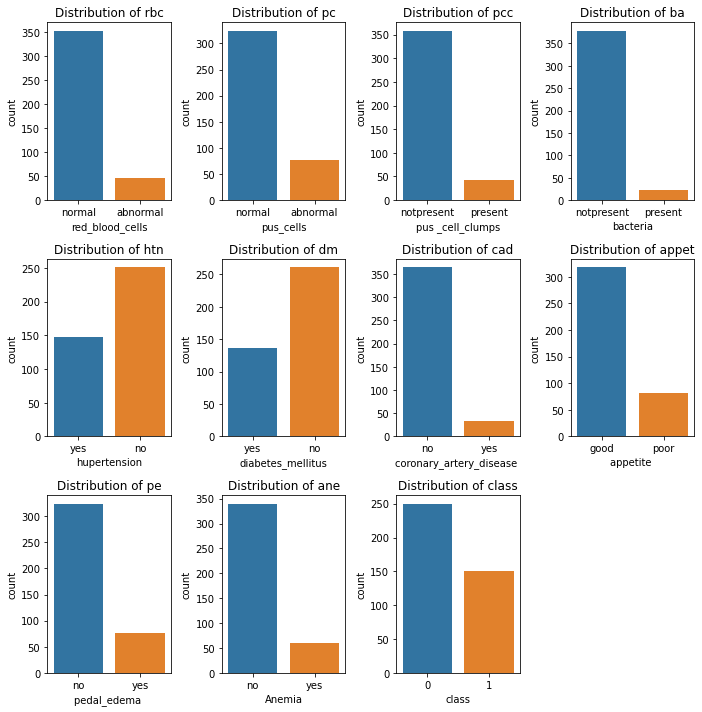

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))



#these columns have some white spaces, so trim
df['diabetes_mellitus'] = df['diabetes_mellitus'].str.strip()
df['coronary_artery_disease '] = df['coronary_artery_disease '].str.strip()
# df['class'] = df['class'].str.strip()

# Plot countplot on each subplot
sns.countplot(x='red_blood_cells', data=df, ax=axes[0, 0]).set(title='Distribution of rbc')

sns.countplot(x='pus_cells', data=df, ax=axes[0, 1]).set(title='Distribution of pc')

sns.countplot(x='pus _cell_clumps', data=df, ax=axes[0, 2]).set(title='Distribution of pcc')

sns.countplot(x='bacteria', data=df, ax=axes[0, 3]).set(title='Distribution of ba')

sns.countplot(x='hupertension', data=df, ax=axes[1, 0]).set(title='Distribution of htn')

sns.countplot(x='diabetes_mellitus', data=df, ax=axes[1, 1]).set(title='Distribution of dm')

sns.countplot(x='coronary_artery_disease ', data=df, ax=axes[1, 2]).set(title='Distribution of cad')

sns.countplot(x='appetite ', data=df, ax=axes[1, 3]).set(title='Distribution of appet')

sns.countplot(x='pedal_edema ', data=df, ax=axes[2, 0]).set(title='Distribution of pe')

sns.countplot(x='Anemia', data=df, ax=axes[2, 1]).set(title='Distribution of ane')

sns.countplot(x='class', data=df, ax=axes[2, 2]).set(title='Distribution of class')
# Adjust subplot spacing
plt.tight_layout()
# Delete the last subplot
fig.delaxes(axes[2][3])
# Show the plot
plt.show()

In [7]:
#replace normal, present, yes, good and ckd with 1
#replace abnormal, not present , no,  poor and not ckd with 0
df['hupertension'] = df['hupertension'].map({'yes':1,'no':0})
df['diabetes_mellitus'] = df['diabetes_mellitus'].map({'yes':1,'no':0})
df['coronary_artery_disease '] = df['coronary_artery_disease '].map({'yes':1,'no':0})
df['appetite '] = df['appetite '].map({'good':1,'poor':0})
df['Anemia'] = df['Anemia'].map({'yes':1,'no':0})
df['pedal_edema '] = df['pedal_edema '].map({'yes':1,'no':0})
df['bacteria'] = df['bacteria'].map({'present':1,'notpresent':0})
df['pus _cell_clumps'] = df['pus _cell_clumps'].map({'present':1,'notpresent':0})
df['pus_cells'] = df['pus_cells'].map({'abnormal':1,'normal':0})
df['red_blood_cells'] = df['red_blood_cells'].map({'abnormal':1,'normal':0})
# df['class'] = df['class'].replace({'ckd': 1, 'notckd': 0})

In [8]:
df.head(10)

,age,specific gravity,albumin,suger,red_blood_cells,pus_cells,pus _cell_clumps,bacteria,hupertension,diabetes_mellitus,...,blood_glucose_random,blood_urea,serum_creatinine,Sodium,Potassium,Hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,1.020,1.0,0.0,0,0,0,0,1.0,1.0,...,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.000000,5.200000,0
1,7.0,1.020,4.0,0.0,0,0,0,0,0.0,0.0,...,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.000000,4.707435,0
2,62.0,1.010,2.0,3.0,0,0,0,0,0.0,1.0,...,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.000000,4.707435,0
3,48.0,1.005,4.0,0.0,0,1,1,0,1.0,0.0,...,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.000000,3.900000,0
4,51.0,1.010,2.0,0.0,0,0,0,0,0.0,0.0,...,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.000000,4.600000,0
5,60.0,1.015,3.0,0.0,0,0,0,0,1.0,1.0,...,74.000000,25.0,1.1,142.000000,3.200000,12.2,39.0,7800.000000,4.400000,0
6,68.0,1.010,0.0,0.0,0,0,0,0,0.0,0.0,...,100.000000,54.0,24.0,104.000000,4.000000,12.4,36.0,8406.122449,4.707435,0
7,24.0,1.015,2.0,4.0,0,1,0,0,0.0,1.0,...,410.000000,31.0,1.1,137.528754,4.627244,12.4,44.0,6900.000000,5.000000,0
8,52.0,1.015,3.0,0.0,0,1,1,0,1.0,1.0,...,138.000000,60.0,1.9,137.528754,4.627244,10.8,33.0,9600.000000,4.000000,0
9,53.0,1.020,2.0,0.0,1,1,1,0,1.0,1.0,...,70.000000,107.0,7.2,114.000000,3.700000,9.5,29.0,12100.000000,3.700000,0


In [9]:
import numpy as np
# Replace invalid values with NaN
df['packed_cell_volume'] = df['packed_cell_volume'].replace('\t?', np.nan)
df['red_blood_cell_count'] = df['red_blood_cell_count'].replace('\t?', np.nan)

df['white_blood_cell_count'] = df['white_blood_cell_count'].replace('\t?', np.nan)
df['red_blood_cells'] = df['red_blood_cells'].replace('\t?', np.nan)
df['class'] = df['class'].replace('\t?', np.nan)

# Convert the columns to float
df['packed_cell_volume'] = df['packed_cell_volume'].astype(float)
df['red_blood_cell_count'] = df['red_blood_cell_count'].astype(float)
df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(float)
df['red_blood_cells'] = df['red_blood_cells'].astype(float)
df['class'] = df['class'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       400 non-null    float64
 1   specific gravity          353 non-null    float64
 2   albumin                   354 non-null    float64
 3   suger                     351 non-null    float64
 4   red_blood_cells           400 non-null    float64
 5   pus_cells                 400 non-null    int64  
 6   pus _cell_clumps          400 non-null    int64  
 7   bacteria                  400 non-null    int64  
 8   hupertension              398 non-null    float64
 9   diabetes_mellitus         398 non-null    float64
 10  coronary_artery_disease   398 non-null    float64
 11  appetite                  400 non-null    int64  
 12  pedal_edema               400 non-null    int64  
 13  Anemia                    400 non-null    int64  
 14  blood_pres

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [12]:
X

,age,specific gravity,albumin,suger,red_blood_cells,pus_cells,pus _cell_clumps,bacteria,hupertension,diabetes_mellitus,...,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,Sodium,Potassium,Hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,1.020,1.0,0.0,0.0,0,0,0,1.0,1.0,...,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,1.020,4.0,0.0,0.0,0,0,0,0.0,0.0,...,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,1.010,2.0,3.0,0.0,0,0,0,0.0,1.0,...,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,1.005,4.0,0.0,0.0,1,1,0,1.0,0.0,...,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,1.010,2.0,0.0,0.0,0,0,0,0.0,0.0,...,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,1.020,0.0,0.0,0.0,0,0,0,0.0,0.0,...,80.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000
396,42.0,1.025,0.0,0.0,0.0,0,0,0,0.0,0.0,...,70.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000
397,12.0,1.020,0.0,0.0,0.0,0,0,0,0.0,0.0,...,80.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000
398,17.0,1.025,0.0,0.0,0.0,0,0,0,0.0,0.0,...,60.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [14]:
#check for and print NaN values
nan_values = df.isnull().sum()
print(nan_values)

age                          0
specific gravity            47
albumin                     46
suger                       49
red_blood_cells              0
pus_cells                    0
pus _cell_clumps             0
bacteria                     0
hupertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     0
pedal_edema                  0
Anemia                       0
blood_pressure               0
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
Sodium                       0
Potassium                    0
Hemoglobin                   0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
class                        0
dtype: int64


In [15]:
# Replace NaN values with the mean
X = X.fillna(X.mean())

In [16]:
#check again for and print NaN values
nan_values = X.isnull().sum()
print(nan_values)

age                         0
specific gravity            0
albumin                     0
suger                       0
red_blood_cells             0
pus_cells                   0
pus _cell_clumps            0
bacteria                    0
hupertension                0
diabetes_mellitus           0
coronary_artery_disease     0
appetite                    0
pedal_edema                 0
Anemia                      0
blood_pressure              0
blood_glucose_random        0
blood_urea                  0
serum_creatinine            0
Sodium                      0
Potassium                   0
Hemoglobin                  0
packed_cell_volume          0
white_blood_cell_count      0
red_blood_cell_count        0
dtype: int64


In [17]:
X_scalar=MinMaxScaler()
X_scalar.fit(X)
col_name=X.columns
X[col_name]=X_scalar.transform(X)
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle = True)

In [18]:
df.head(20)

,age,specific gravity,albumin,suger,red_blood_cells,pus_cells,pus _cell_clumps,bacteria,hupertension,diabetes_mellitus,...,blood_glucose_random,blood_urea,serum_creatinine,Sodium,Potassium,Hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,1.020,1.0,0.0,0.0,0,0,0,1.0,1.0,...,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.000000,7800.000000,5.200000,0
1,7.0,1.020,4.0,0.0,0.0,0,0,0,0.0,0.0,...,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.000000,6000.000000,4.707435,0
2,62.0,1.010,2.0,3.0,0.0,0,0,0,0.0,1.0,...,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.000000,7500.000000,4.707435,0
3,48.0,1.005,4.0,0.0,0.0,1,1,0,1.0,0.0,...,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.000000,6700.000000,3.900000,0
4,51.0,1.010,2.0,0.0,0.0,0,0,0,0.0,0.0,...,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.000000,7300.000000,4.600000,0
5,60.0,1.015,3.0,0.0,0.0,0,0,0,1.0,1.0,...,74.000000,25.0,1.1,142.000000,3.200000,12.2,39.000000,7800.000000,4.400000,0
6,68.0,1.010,0.0,0.0,0.0,0,0,0,0.0,0.0,...,100.000000,54.0,24.0,104.000000,4.000000,12.4,36.000000,8406.122449,4.707435,0
7,24.0,1.015,2.0,4.0,0.0,1,0,0,0.0,1.0,...,410.000000,31.0,1.1,137.528754,4.627244,12.4,44.000000,6900.000000,5.000000,0
8,52.0,1.015,3.0,0.0,0.0,1,1,0,1.0,1.0,...,138.000000,60.0,1.9,137.528754,4.627244,10.8,33.000000,9600.000000,4.000000,0
9,53.0,1.020,2.0,0.0,1.0,1,1,0,1.0,1.0,...,70.000000,107.0,7.2,114.000000,3.700000,9.5,29.000000,12100.000000,3.700000,0


In [19]:
X_train

,age,specific gravity,albumin,suger,red_blood_cells,pus_cells,pus _cell_clumps,bacteria,hupertension,diabetes_mellitus,...,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,Sodium,Potassium,Hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
231,0.659091,0.620397,0.20339,0.090028,0.0,0.0,0.0,0.0,1.0,1.0,...,0.307692,0.527778,0.127086,0.031746,0.842271,0.026966,0.571429,0.577778,0.256451,0.441938
71,0.500000,0.250000,0.20000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,...,0.076923,0.301282,0.232349,0.038360,0.861199,0.033708,0.455782,0.422222,0.512397,0.186441
139,0.443182,0.500000,0.40000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,...,0.153846,0.269309,0.170732,0.031746,0.804416,0.035955,0.544218,0.533333,0.256451,0.441938
359,0.818182,0.750000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.141026,0.124519,0.002646,0.899054,0.026966,0.959184,0.977778,0.157025,0.406780
122,0.363636,0.620397,0.20339,0.090028,0.0,0.0,0.0,0.0,1.0,0.0,...,0.153846,0.269309,0.558408,0.156085,0.791798,0.029213,0.197279,0.664100,0.256451,0.441938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.522727,0.500000,0.00000,0.400000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.230769,0.410256,0.057766,0.011905,0.854890,0.033708,0.687075,0.666667,0.256451,0.441938
391,0.386364,1.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.134615,0.037227,0.009259,0.867508,0.035955,0.850340,0.777778,0.148760,0.711864
306,0.568182,0.750000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.226496,0.073171,0.010582,0.854890,0.044944,0.823129,0.955556,0.086777,0.610169
87,0.772727,0.000000,0.20000,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,...,0.384615,0.314103,0.116816,0.033069,0.839298,0.047803,0.544218,0.511111,0.148760,0.491525


In [20]:
X_test

,age,specific gravity,albumin,suger,red_blood_cells,pus_cells,pus _cell_clumps,bacteria,hupertension,diabetes_mellitus,...,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,Sodium,Potassium,Hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
286,0.784091,0.750000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153846,0.126068,0.042362,0.005291,0.886435,0.056180,0.789116,0.777778,0.314050,0.661017
155,0.545455,0.750000,0.60000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,...,0.153846,0.215812,0.098845,0.018519,0.839298,0.047803,0.544218,0.600000,0.103306,0.441938
182,0.670455,0.750000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.232906,0.055199,0.005291,0.854890,0.035955,0.557823,0.577778,0.256451,0.441938
245,0.522727,0.620397,0.20339,0.090028,0.0,0.0,0.0,0.0,1.0,0.0,...,0.384615,0.173077,0.198973,0.064815,0.823344,0.085393,0.217687,0.222222,0.206612,0.084746
226,0.704545,0.500000,0.80000,0.400000,1.0,1.0,0.0,1.0,1.0,1.0,...,0.384615,0.301282,0.134788,0.089947,0.854890,0.047191,0.326531,0.377778,0.219008,0.220339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.727273,0.500000,0.40000,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,...,0.153846,0.908120,0.101412,0.017196,0.798107,0.031461,0.639456,0.533333,0.305785,0.389831
249,0.613636,0.250000,0.80000,0.200000,0.0,1.0,1.0,0.0,1.0,1.0,...,0.307692,0.329060,0.789474,0.170635,0.753943,0.089888,0.000000,0.000000,0.132231,0.000000
90,0.693182,0.250000,0.40000,0.400000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.384615,0.551282,0.086008,0.037037,0.873817,0.022472,0.673469,0.688889,0.314050,0.355932
252,0.488636,1.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.128205,0.121951,0.002646,0.899054,0.042697,0.870748,0.822222,0.285124,0.440678


In [21]:
y_train

231    0
71     0
139    0
359    1
122    0
      ..
135    0
391    1
306    1
87     0
366    1
Name: class, Length: 320, dtype: int32

In [22]:
y_test

286    1
155    0
182    0
245    0
226    0
      ..
170    0
249    0
90     0
252    1
320    1
Name: class, Length: 80, dtype: int32

In [23]:
model=Sequential()
model.add(Dense(256 , input_dim=len(X.columns),
                kernel_initializer=k.initializers.random_normal(seed=13),activation="relu"))
model.add(Dense(1 , activation="hard_sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [24]:
history =model.fit(X_train,y_train,epochs=20,batch_size=X_train.shape[0])

Epoch 1/20
1/1 [==============================] - 0s 424ms/step - loss: 0.6966 - accuracy: 0.4812
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.7969
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.9625
Epoch 4/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.7906
Epoch 5/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6656
Epoch 6/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.6344
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.6313
Epoch 8/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.6313
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 0.5816 - accuracy: 0.6313
Epoch 10/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.6313
Epoch 11/20
1/1 [===================

In [25]:
model.save("ckd.model")

INFO:tensorflow:Assets written to: ckd.model\assets


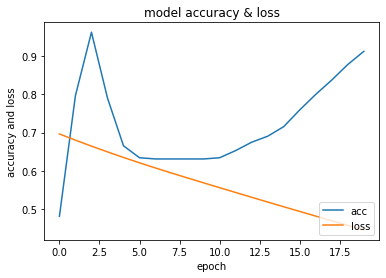

   
shapes of training data: (320, 24)
shape of test data : (80, 24)
      


In [26]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc','loss'],loc='lower right')
plt.show()
print("   ")
print("shapes of training data:" ,X_train.shape)
print("shape of test data :" ,X_test.shape)
print("      ")


In [27]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

3/3 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8750
Test Loss: 0.46
Test Accuracy: 0.88


In [28]:
####### evalution ###################################
model=load_model("ckd.model")
pred=model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred]
scores=model.evaluate(X_test,y_test)
print("orignal :{0}" .format(", ".join([str(X) for X in y_test ])))
print("predicted :{0}" .format(", ".join([str(X) for X in y_test ])))

3/3 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8750
orignal :1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1
predicted :1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1
